In [2]:
import pandas as pd
cp_100 = pd.read_csv('F:\CodingEnvironment\dvrpsd\experiment\CP_100.csv')
cp_100.head()

,file_name,seed,ited,sized,td,rd,time
0,h100c101.csv,1,5,5,1473.350182,0,6.123789
1,h100c101.csv,2,5,5,1387.981942,0,5.283890
2,h100c101.csv,3,5,5,1494.756457,0,6.196696
3,h100c101.csv,1,5,10,1664.483967,0,8.449386
4,h100c101.csv,2,5,10,1511.337548,0,8.711607


In [ ]:
# import re
ub = pd.read_csv(r'F:\CodingEnvironment\dvrpsd\experiment\upperbound_100_25.csv')

ub['data_path'] = ub['data_path'].apply(lambda x: 'h' + x if not x.startswith('h') else x)

ub

,data_path,num_vehicle,carbon_upper,reject_upper
0,h200C1_2_1.csv,50,49463.05614,201
1,h200C1_2_10.csv,50,49463.05614,201
2,h200C1_2_2.csv,50,49463.05614,201
3,h200C1_2_3.csv,50,49463.05614,201
4,h200C1_2_4.csv,50,49463.05614,201


In [4]:
merged_cp_100 = pd.merge(cp_100, ub, left_on='file_name', right_on='data_path')
print(merged_cp_100.head)
merged_cp_100['obj'] = (merged_cp_100['td'] / merged_cp_100['carbon_upper'] + merged_cp_100['rd'] / merged_cp_100[' reject_upper'])/2

# Select the required columns for the new DataFrame
new_df = merged_cp_100[['file_name','ited','sized', 'td', 'rd', 'obj', 'time']].copy()
new_df

NameError: name 'cp_100' is not defined

In [51]:
new_df.to_csv("combined_100.csv", index=False)

In [5]:
cp_100_merge = new_df.groupby(['ited','sized']).agg({
    'obj': 'mean',
    'time': 'mean'
}).reset_index()

# Display the result
cp_100_merge

,ited,sized,obj,time
0,5,5,0.057989,5.515491
1,5,10,0.058418,7.843684
2,5,20,0.057709,12.526508
3,5,30,0.058641,17.276029
4,10,5,0.057392,10.267579
5,10,10,0.058484,15.045990
6,10,20,0.058208,24.348230
7,10,30,0.057845,33.742809
8,20,5,0.062575,31.566008
9,20,10,0.060971,46.140537


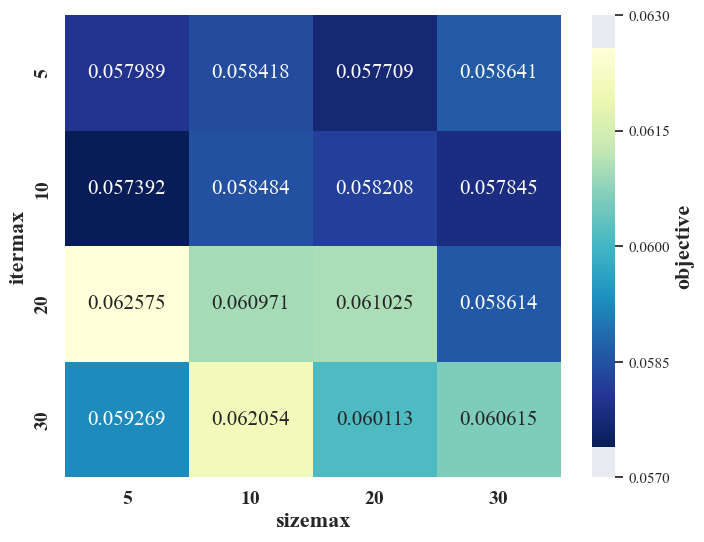

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Pivot the data to format it for the heatmap
heatmap_data = cp_100_merge.pivot(index="ited", columns="sized", values="obj")

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.set(font="Times New Roman")  # Set default font for seaborn
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".6f",
    cmap="YlGnBu_r",
    annot_kws={"fontname": "Times New Roman", "fontsize": 15},  # Set font for numbers
    cbar_kws={'label': 'obj Value'},  # Set font for color bar label
)

# Adjust the title, x, and y labels font properties
# plt.title("Dataset 100", fontsize=19, fontname="Times New Roman", fontweight='bold')
plt.xlabel("sizemax", fontsize=16, fontname="Times New Roman",  fontweight='bold')
plt.ylabel("itermax", fontsize=16, fontname="Times New Roman",  fontweight='bold')

# Customize color bar label font
cbar = plt.gca().collections[0].colorbar
cbar.set_label("objective", fontsize=16, fontname="Times New Roman", fontweight='bold')

min_val, max_val = round(heatmap_data.min().min(), 3), round(heatmap_data.max().max(), 3)
cbar.set_ticks(np.linspace(min_val, max_val, 5))  # Set 5 evenly spaced ticks

plt.xticks(fontsize=14, fontname="Times New Roman",  fontweight='bold')  # Increase font size for x-axis tick labels
plt.yticks(fontsize=14, fontname="Times New Roman",  fontweight='bold')  # Increase font size for y-axis tick labels


plt.savefig("CP_100.pdf", format='pdf', dpi=300, bbox_inches='tight')
# Show plot
plt.show()